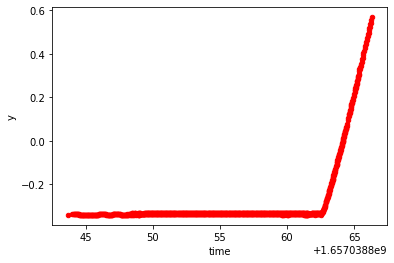

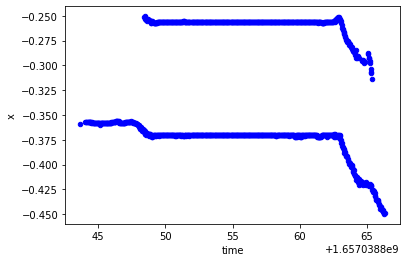

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv ('robotPosition.csv', names=["time", "marker", "x", "y", "z"])
dfBno = pd.read_csv('raspberryPi/data1.csv')
df.head()
df.plot(kind='scatter',x='time',y='y',color='red')
df.plot(kind='scatter',x='time',y='x',color='blue')
plt.show()


### The robot moved in the negative y-direction and was offset from the imu in the x-direction 

![](media/mobrob.png)

### The BNO055 is oriented as follows      

![](media/Bno.jpg)


In [75]:
ti_cam = df['time'][df.index[0]]
tf_cam = df['time'][df.index[-1]]
ti_BNO = dfBno['time'][dfBno.index[0]]
tf_BNO = dfBno['time'][dfBno.index[-1]]
print("ti_cam: ",ti_cam)
print("tf_cam: ",tf_cam)
print("ti_Bno: ",ti_BNO)
print("tf_Bno: ",tf_BNO)

ti_cam:  1657038843.6677928
tf_cam:  1657038866.328599
ti_Bno:  1657038862.4646204
tf_Bno:  1657038866.646741


### The initial and final from the BNO, $$ t_0 = 1657038862.4646204 $$ $$ t_f = 1657038866.6467407 $$

192


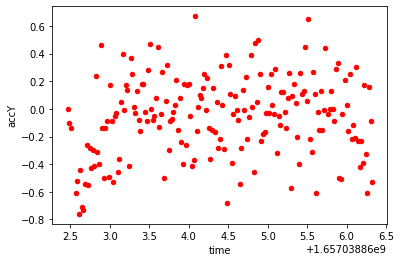

In [76]:
dfBno = dfBno[(dfBno["time"] <= tf_cam)]
dfBno = dfBno[(dfBno["accY"] >= -1)]
dfBno.plot(kind='scatter',x='time',y='accY',color='red')
print(len(dfBno))
plt.show()

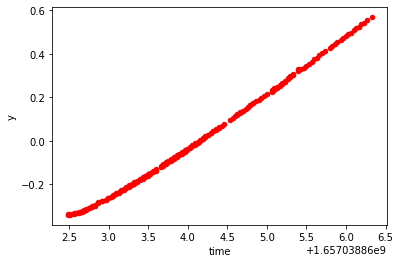

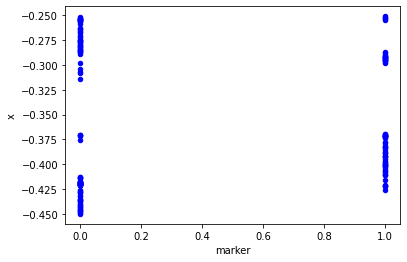

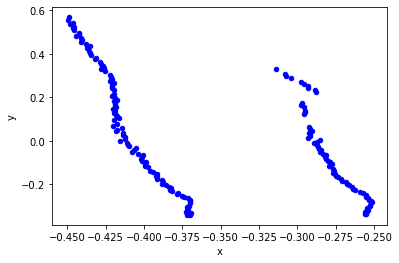

In [77]:
df = df[(df["time"] >= ti_BNO)]# & (df["time"] <= 1657038866.6467407)]
df.plot(kind='scatter',x='time',y='y',color='red')
#df[df["marker"] == 1].plot(kind='scatter',x='time',y='x',color='blue')
df.plot(kind='scatter',x='marker',y='x',color='blue')
df.plot(kind='scatter',x='x',y='y',color='blue')
plt.show()


In [78]:
print(len(df))

181


In [79]:
#df.loc[df["x"] <  -0.325, "x"] += 0.1
#df_new = df
# for index, row in df.iterrows():
#     #print(, row["x"])
#     if row["x"] < -0.325:
#         df["x"][index] = row["x"] + 0.116/2
#     else:
#         df["x"][index] = row["x"] - 0.116/2

# df.plot(kind='scatter',x='x',y='y',color='blue')
# plt.show()
modifX = []
for val in df["x"]:
    if val < -0.325: 
        val += 0.116/2
    else:
        val -= 0.116/2
    modifX.append(val)
len(modifX)
df['newX'] = modifX

<ipython-input-79-fee2f63b6dfa>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['newX'] = modifX


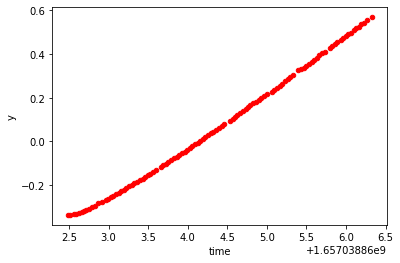

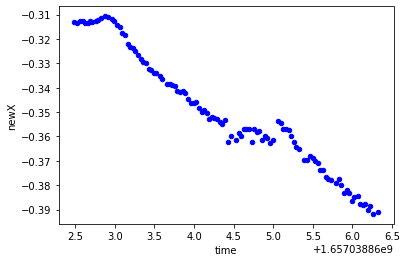

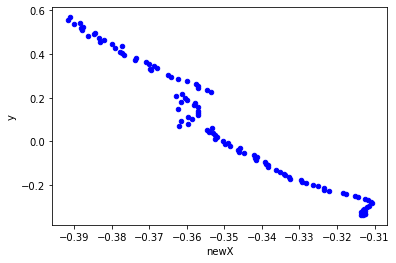

In [80]:
df = df.groupby('time').mean().reset_index()
df.plot(kind='scatter',x='time',y='y',color='red')
df.plot(kind='scatter',x='time',y='newX',color='blue')
df.plot(kind='scatter',x='newX',y='y',color='blue')
plt.show()

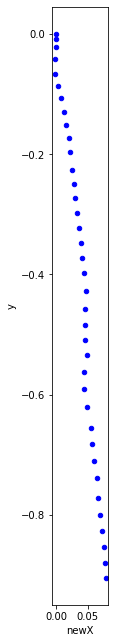

In [91]:
df_new = df.groupby(np.arange(len(df))//3).mean()
df_new.loc[:,'y'] *= -1
df_new.loc[:,'newX'] *= -1
df_new.loc[:,'y'] += -df_new['y'][0]
df_new.loc[:,'newX'] += -df_new['newX'][0]
df_new.plot(kind='scatter',x='newX',y='y',color='blue', figsize=(1,11))
plt.show()

In [92]:
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
my_y = df_new["y"].values.reshape(-1, 1)
my_x = df_new["newX"].values.reshape(-1, 1)
lm = LinearRegression()
lm.fit(my_x, my_y)
print("Coefficients: \n", lm.coef_)
print("Intercept: \n", lm.intercept_)
print("R", lm.score)

#print(r_value**2)

Coefficients: 
 [[-11.33163626]]
Intercept: 
 [0.008332]
R <bound method RegressorMixin.score of LinearRegression()>
